# Visualising Data and Linear Regression

As you progress through your degree program you will take part in lots of experiments and collect a vast amount of data. Typically data will initially be recorded in a well designed table and although having an initial record of our measured data is important (as we may need to refer back to it in the future), if I were to ask you to spot patterns in data from a table alone you may find this quite difficult. 

Take a look at the data below and try to quickly spot a pattern.

![image](Wk3_Figures/RandomDataTable.png)

Did you manage to spot the trends? Did it take less than a second or so? Probably not. 

Now let’s take a look at this data plotted using Python…

![image](Wk3_Figures/RandomData.png)

From the plot above it is immediately obvious that the first set of data follows a linear trend, the second follows a normal distribution, and the third is some sort of power law. 

When writing reports we want to show our data! It may be justifiable to add some of our data tables to an appendix at the end of the report, but generally the best way to present data is graphically.

---
## The Features of a High Quality Plot 

It is one thing to make a plot to visualise data, it is another thing to make a high-quality plot to visualise data. 

Imagine that we have performed an experiment to determine the Young's modulus of a wire. In the experiment we applied a range of tensile forces to a wire and measured the corresponding extension of the wire. Below are two plots that show visualisations of the measured data. 

Consider which of the two plots is the most visually appealing and why? I would hope that you agree that the second plot provides a better visual representation of our data.

Bad Plot…
![image](Wk3_Figures/BadPlot.png)

Good Plot...
![image](Wk3_Figures/GoodPlot.png)
    
Features of high quality plot:

1. Data is centred and fills the plot.

2. Descriptive axis titles with units are present.

3. Data points are present and not joined up with a trendline.

4. Associated errors are illustrated using error bars.

5. A model fit is superimposed onto the data.

6. A legend is present to differentiate between datasets / lines of best fit.

Optional extras:

7. Grid lines can be useful as a guide for the eyes.

8. A concise but descriptive title may be appropriate, but more often than not a figure caption should be used, which negates the need to include a plot title.

---
## How Do We Make High Quality Plots in Python?

Now that we have identified what features should be present in a plot, we will introduce the tools we need to make them in Python. We will be using a Python library called Matplotlib.pyplot. Prior to making a plot in Python, we may need to import our data from an external file. To do this we will use the numpy.loadtxt() function to import our data from a .csv file (comma separated value file).

Firstly, let’s save our data as a .csv file. To do this enter your data into a spreadsheet such as Google Sheets or Microsoft Excel. If you are using Google Sheets, simply export the file as a .csv file, if you are using Excel, use save as to do the same.

![image](Wk3_Figures/GoogleSheetsCSV.gif)
![image](Wk3_Figures/MakeCSV.gif)

Once you have made your csv file, move it into the same directory as the script you are going to use to plot the data contained within it. Next, we can import the data using the following section of code:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

force, errorForce, extension, errorExtension = np.loadtxt("Wk3_ForceExtensionData.csv", delimiter = ',', unpack = True, skiprows = 1)

or alternatively...

In [9]:
data = np.loadtxt("Wk3_ForceExtensionData.csv", delimiter = ',', unpack = False, skiprows = 1)

force = data[:,0] # The first column in the data array
errorForce = data[:,1] # The second column in the data array
extension = data[:,2] # The third column in the data array
errorExtension = data[:,3] # The fourth column in the data array

Note that when "unpack = True" there are four variables on the left hand side of the equal sign. This is because we are telling numpy to create an 1D array for each column of our csv file. Alternatively, we can set "unpack = False" which means that we can load the information from our csv file as a single array which we can then slice later. If needed, we could also directly enter our data into the Python script as a numpy array or list.

The "delimiter = ','" argument simply tells numpy that when it is reading our csv file, the numbers are separated by commas. If we used a different file type (such as .txt) we may want to set that equal to something else. 

We have also included the argument "skiprows = 1", which tells numpy to ignore the first line of our csv file as this is just the column headings and not the data. We could omit this argument if we did not include the headings in our file.

Now that we have successfully imported our data we can begin making a fitting script. To do this we are going to use plt.errorbar() (plots x-y data with error bars) and plt.plot() (plots x-y data without error bars). The information required to determine the gradient and intercept of your line of best fit via a manual regression can be found at the end of this document.

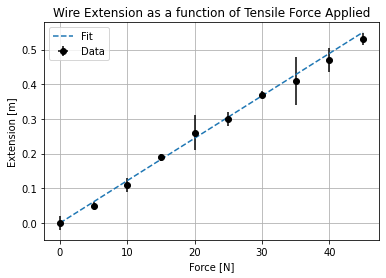

In [10]:
# Plotting the raw data with error bars, and including arguements for the markers, 
# linestyle, label and color (US spelling - not colour!)
plt.errorbar(force, extension, xerr = errorForce, yerr = errorExtension, marker = 'o', color = 'k', linestyle = ' ', label = 'Data')

# Plotting our line of best fit (no markers & no error bars). Note that in this 
# example the xfit-coordinates and y-fit cordinates have not actually been defined. You will need to do this! 
# The numbers below are made up so the code works
xfit = [0,45]
yfit = [0,0.55]
plt.plot(xfit, yfit, marker = None, linestyle = '--', label = 'Fit')

# Setting the axis titles and plot title
plt.xlabel('Force [N]')
plt.ylabel('Extension [m]')
plt.title('Wire Extension as a function of Tensile Force Applied')

# Adding the legend and grid lines
plt.legend()
plt.grid()

# Saving our figure as a png file so that we may use it later (do not take screenshots to use in reports!)
plt.savefig("Force_Extension_Plot.png", dpi = 500)

# Getting Python to show us our plot. This MUST go at the end of our block of code! If not, it will show the plot before the code above has been read.
plt.show()


That might look like a lot of code, but consider that that is all that is needed to produce a very high quality plot suitable for publication using Python. The graphing tools on spreadsheet software are also capable, but they can often be fiddly if you want to add error bars or change the colours of elements; using Python you can simply type the changes you want to make and run the code again!

There are lots of customization options available using matplotlib.pyplot. For example, if you wish to change the shape, size, colour, fill etc. of the data points, or the weight, colour or type (solid, dashed, dotted) of the line of best fit, you can easily do this by adding/changing arguments in the code above. 

Do remember that stylistic choices should be appropriate so that it is not difficult to interpret information from the plot! (e.g. tiny neon green data markers on a light purple background, with a yellow line of best fit may be difficult to read…).

Refer to the documentation below when making stylistic choices in your plots:

1. [Markers](https://matplotlib.org/stable/api/markers_api.html)
2. [Line styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
3. [Colors](https://sites.google.com/view/paztronomer/blog/basic/python-colors)
4. [Legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
5. [Grid lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

There are an endless number of tools available to change the appearance of a plot, but those are some useful ones to have handy! You will naturally come across more plotting tools as and when you need them.


---
## Making Plots with Subplots

Often we would like to make a plot with multiple subplots. It is easy enough to do this using Python and we can reuse much of the code above (although there are some subtle changes we must take into account). 

Let’s once again consider our force-extension plot from above. You will notice that for every data point there is a small discrepancy between the point itself and the line of  best fit. This discrepancy is known as the residual, which may be either positive or negative depending on whether the data point sits below or above the line of best fit. In many areas of physics, it is common practice to plot the residuals for a given data set beneath the main plot. We will do this now using our understanding of loops!

First of all, let’s make a loop to determine our residual for each data point:

In [11]:
slope = 0.011866666666666668 
intercept = 0.0020000000000000018 #These values were determined from a linear regression.

# Firstly, lets make an empty list to store our residual values in
residuals = []
for i in range(len(force)):
    residual = extension[i] - ((force[i]*slope)+intercept)
    residuals.append(residual)

# The .append() function simply tells python to add what ever is in the bracket to the array it is attatched to (in this case residuals).

print(residuals)

[-0.0020000000000000018, -0.011333333333333334, -0.010666666666666672, 0.009999999999999981, 0.020666666666666667, 0.0013333333333332975, 0.011999999999999955, -0.007333333333333414, -0.00666666666666671, -0.006000000000000005]


Now that the residuals have been calculated, we can make our subplot. 

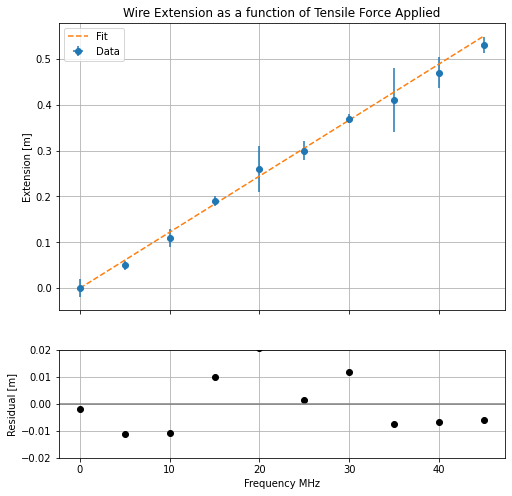

In [12]:
# First we tell Python that we are making a figure with two plots (ax1 and ax2).
# We have added additional arguements here, for example, we have said that we want 
#both plots to have a common x axis and that we want the ratio of the height of the 
# first plot to the second plot to be 4:1.5

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (8,8), gridspec_kw = {'height_ratios':[4,1.5]})

# Next, we make our individual plots as we did before, but this time using ax1. rather than .plt.
ax1.errorbar(force, extension, xerr = errorForce, yerr= errorExtension, linestyle='None', marker='o', label="Data", )
ax1.plot(xfit, yfit, marker = None, linestyle = '--', label = 'Fit')
ax1.set_ylabel('Extension [m]')
ax1.set_title('Wire Extension as a function of Tensile Force Applied')
ax1.grid()
ax1.legend(loc=2)

# Now, moving on to the second axis.
ax2.plot(force,residuals,linestyle='None', marker="o", color = 'k')
ax2.set_ylim(-0.02,0.02) # This changes the limits of the y-axis from the default.
ax2.set_ylabel("Residual [m]")
ax2.grid()
ax2.axhline(y=0, color='grey', linestyle='-') # This adds a grey horizontal line at y=0.

# Methods common to both plots simply use .plt
plt.xlabel("Frequency MHz")
plt.savefig("Force_Extension_Resid.png", dpi = 500)
plt.show()

...as you can see we can easily make plots with subplots using Python!

We are not limited to making stacked subplots, we can have any number of subplots and arrange them within a grid. Try to identify the differences between the codes used to make each different type of subplot on the following website: Creating multiple subplots using Python. 

Alternatively, we can create subplots using [.add_subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html). This method does not constrain us to arranging our plots in a grid e.g. we may position 2 stacked plots on the left and a single larger plot on the right. Take a look [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axes_margins.html#sphx-glr-gallery-subplots-axes-and-figures-axes-margins-py) and at the following example of how to do this:

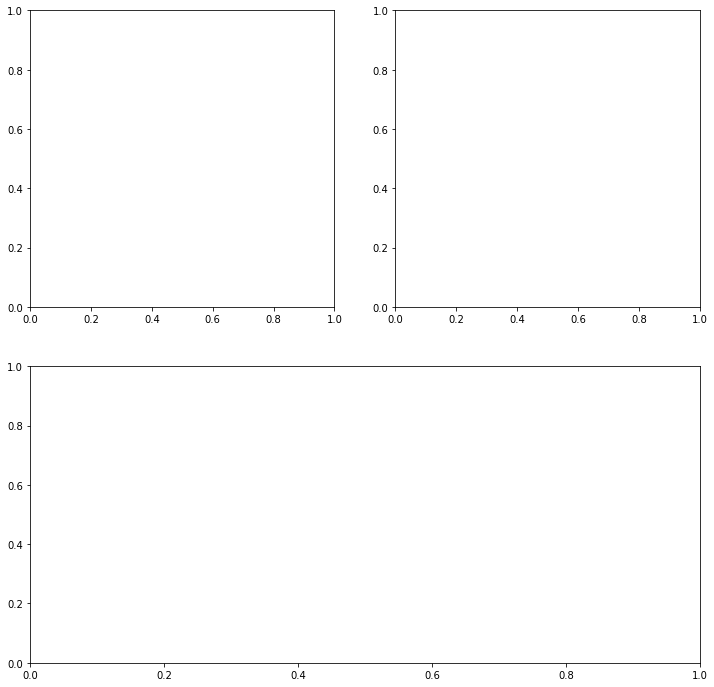

In [13]:
# Firstly, lets set the size of our figure. 
fig=plt.figure(figsize=(12,12))

# Next we can add our subplots and using add_subplot(XYZ) define the placement of the subplots.
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)
plt.show()

---
## Simple Linear Regression (Suplimentary)

During your career as a physicist, you will routinely fit models to experimental data in order to extract information from it. In this section we will discuss the different types of fitting routines commonly employed and when it is most appropriate to use each type. We will focus on three main fitting routines: simple linear regression, weighted least squares, and orthogonal distance regression (ODR).

### Part 1: Simple Linear Regression

A simple linear regression is a special case of least squares fitting (often referred to as "ordinary least squares") and is the routine employed when the model we are fitting to our data is linear i.e. fitting a line of best fit. When using a simple linear regression, we make the assumption that the data has no associated error or that the errors are equal for each data point (this is often referred to as homoscedasticity). 

Lets begin by generating some linear data. We will add some noise to this data so that it is more representative of the type of data we would obtain from experimentation. 

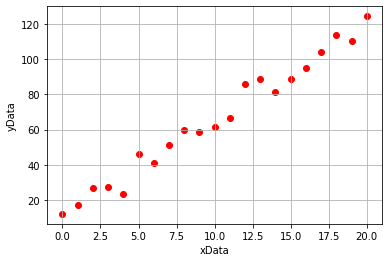

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Generating our xData
xData = np.linspace(0,20,21)

#Generating our noisy yData
yData = 5*xData + 15
noise = np.random.normal(0,5,21)
yData = yData + noise

#Plotting our data
plt.scatter(xData, yData, marker = 'o', color = 'r')
plt.xlabel('xData')
plt.ylabel('yData')
plt.grid()
plt.show()

If we then use the linear regression tool from scipy.states, we would obtain the following fit:

### Part 2: What is the linregress function actually doing?

We now have a line of best fit determined computationally, but what were the calculations performed by the scipy.stats.linregress function when doing so? Lets first consider the model that we are aiming to fit, a straight line given by:

\begin{equation}
    y = mx+c, 
\end{equation}

where $x$ represents an independent variable, $y$ represents a dependant variable, and $m$ and $c$ represent the gradient and intercept of the line of best fit, respectively. In this example, we know what the values of $x$ and $y$ are and we are trying to determine appropriate values for $m$ and $c$. 

With reference to the annotated plot below, we can see that for a given line of best fit, there is a vertical separation between each data point and the line. The discrepancies between the model line of best fit and data points are called the residuals. The least-squares fitting routine minimises the square of the residuals. We use the sum of the square rather than just the sum as some points lie below the line of best fit and others lie above, therefore if we were to just use the sum these values would cancel out and give a value close to zero.

![image](Wk3_Figures/SLR_plot_annotated.png)

The calculations to determine the value of gradient and intercept by minimising the sum of the squared residual values using the simple linear regression model are as follows:

\begin{equation}
    m = \frac{N\sum{x \cdot y} + \sum{x} \cdot\sum{y}}{N\sum{\left(x^2\right)} - \sum{\left(x\right)}^2},
\end{equation}

where $N$ is the number of data points, and:

\begin{equation}
    c = \frac{\sum{y} - m \cdot \sum{x}}{N}.
\end{equation}

Lets perform the calculations above to derive values for the gradient and intercept of the line of best fit for our noisy data: 

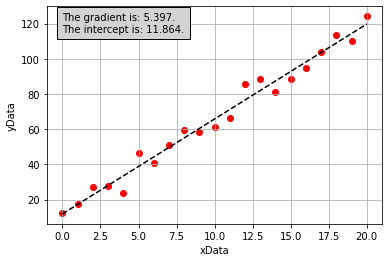

In [15]:
# Performing the calculations used to determine the gradient:
N_sum_xy = len(xData)*np.sum(xData * yData) 
sum_x_sum_y = np.sum(xData)*np.sum(yData) 
N_sum_xsquared = len(xData)*np.sum(xData**2) 
sum_x_squared = np.sum(xData)**2 

gradient = (N_sum_xy - sum_x_sum_y)/(N_sum_xsquared - sum_x_squared)

#Performing the calculations used to determine the intercept:
sum_y = np.sum(yData) 
sum_x = np.sum(xData)
    
intercept = (sum_y - gradient*sum_x)/len(xData)

#Plotting the data, line of best fit, and an annotation containing the gradient and intercept:  
plt.scatter(xData, yData, marker = 'o', color = 'r')
plt.plot(xData, gradient*xData + intercept, color ='k', linestyle = '--')
plt.xlabel('xData')
plt.ylabel('yData')

txt = str('The gradient is: ' + str("{:.3f}".format(gradient)) + '.' + '\n' + 
          'The intercept is: '+ str("{:.3f}".format(intercept)) + '.')
plt.text(0, max(yData)-8, txt, wrap=True, horizontalalignment='left', fontsize=10, 
         bbox=dict(facecolor='lightgrey', edgecolor='k', pad=5.0))

plt.grid()
plt.show()

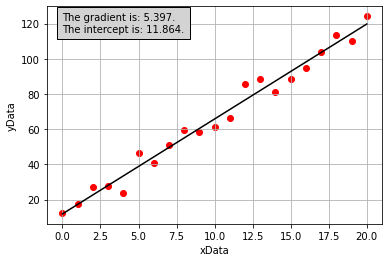

In [16]:
import scipy.stats as stats

#Performing the linear regression using the linregress function
FitResults = stats.linregress(xData, yData)

#Plotting the data, line of best fit, and an annotation containing the gradient and intercept: 
plt.scatter(xData, yData, marker = 'o', color = 'r')
plt.plot(xData, FitResults.slope*xData + FitResults.intercept, color ='k')
plt.xlabel('xData')
plt.ylabel('yData')

txt = str('The gradient is: ' + str("{:.3f}".format(FitResults.slope)) + '.' + '\n' + 
          'The intercept is: '+ str("{:.3f}".format(FitResults.intercept)) + '.')
plt.text(0, max(yData)-8, txt, wrap=True, horizontalalignment='left', fontsize=10, bbox=dict(facecolor='lightgrey', edgecolor='k', pad=5.0))

plt.grid()
plt.show()

From the figure above, it is apparent that the line of best fit we have calculated is the same as the one calculated by the scipy.stats.linregress function. We now understand what this function is doing!

### Part 3: Where did our equations come from?

In our example above we simply stated what the equations used to determine our optimal value of the gradient and intercept were, but we proivded no explaination as to how these equations were derived. This will be explained in this section. 

Note: An understanding of partial differention is required to perform this derivation.

Once again we are going to consider this idea of the residual, we defined this earlier as the difference between the line of best fit and any given data point. Written mathematically this may be expressed as:

\begin{equation}
R = y_{data}-y_{model},
\end{equation}

which may also be expressed as:

\begin{equation}
R = y_{data} - (m*x + c),
\end{equation}

where $m$ and $c$ are the gradient and intercept determined by our linear regression. Now we can consider the sum of the squared residuals:

\begin{equation}
\sum{R^{2}}= \sum{[y_{data} - (mx + c)]^{2}}.
\end{equation}

In a simple linear regression, we want to minimise the value of the sum of the squared residuals. How do we do this? Another way to say this is we want to find the minimum of the function, which suggests that we need to do some differentiation! In this case we are going to take the partial derivatives of the function with respect to the terms we are trying to minimise $m$ and $c$:

<font color=blue>\begin{equation}
\frac{\partial \sum R^{2}}{\partial m}= \sum \frac{\partial}{\partial m} \left([y_{data} - (mx + c)]^{2} \right)
\end{equation}</font>

We can solve this partial differential by using the chain rule: We will bring down the power and then multiply by the partial differential of what is inside the brackets:

<font color=blue>\begin{equation}
\frac{\partial \sum R^{2}}{\partial m}= \sum{2 \cdot [y_{data} - (mx + c)]\cdot -x}
\end{equation}</font>

Similarly, when taking the partial differential with respect to $c$ we get:

<font color=green>\begin{equation}
\frac{\partial \sum R^{2}}{\partial c}= \sum \frac{\partial}{\partial c} \left([y_{data} - (mx + c)]^{2} \right) = \sum{2\cdot [y_{data} - (mx + c)]\cdot -1}
\end{equation}</font>

Next, as we want to find the values of $m$ and $c$ when the function is at a minimum, we set the partial differentials equal to zero:

<font color=blue>\begin{equation}
-2\sum{[y_{data} - (mx + c)]\cdot x} = 0,
\end{equation}</font>
    
and

<font color=green>\begin{equation}
-2 \sum{[y_{data} - (mx + c)]} = 0.
\end{equation}</font>

Finally, we solve these simeltanous equations to determine the values of $m$ and $c$. Let's begin by rewriting our equations so that they are easier to solve. The $-2$ terms disappear when we set the equations equal to zero:

<font color=blue>\begin{equation}
\left(\sum{y_{data}} -\sum{mx} -\sum{c}\right)x = 0,
\end{equation}</font>

and

<font color=green>\begin{equation}
\sum{y_{data}} -\sum{mx} -\sum{c} = 0.
\end{equation}</font>

As $m$ and $c$ are constants, they may be taken out of the summations, such that:


<font color=blue>\begin{equation}
\left(\sum{y_{data}} -m\sum{x} -(n\cdot c)\right)x = 0,
\end{equation}</font>

and

<font color=green>\begin{equation}
\sum{y_{data}} -m\sum{x} -(n\cdot c) = 0.
\end{equation}</font>

Therefore, our equation for the intercept becomes:

<font color=green>\begin{equation}
c = \frac{\sum{y_{data}}}{n} - \frac{m\sum{x}}{n}.
\end{equation}</font>

which is equal to the equation we used in the previous section to determine our value of the intercept:

<font color=green>\begin{equation}
c = \frac{\sum{y_{data}} - m\sum{x}}{n}.
\end{equation}</font>

As the sum of the a set of values divided by the number of values is equal to the average value, the expression above can be expressed in terms of the mean values of y and x, $\bar{y}$ and $\bar{x}$, respectively:

<font color=green>\begin{equation}
c = \bar{y} - m \cdot \bar{x}.
\end{equation}</font>

Using the expression for the intercept, we are able to determine a value for our gradient:

<font color=blue>\begin{equation}
\sum{[y_{data} - (mx + \bar{y} - m \cdot \bar{x})]\cdot x} = 0,
\end{equation}</font>

<font color=blue>\begin{equation}
\sum{[y_{data} - \bar{y} - m(x - \bar{x})]\cdot x} = 0.
\end{equation}</font>

We may then solve the equation for m:

<font color=blue>\begin{equation}
\sum{x(y_{data} - \bar{y})} - mx \sum{(x - \bar{x})} = 0,
\end{equation}</font>

<font color=blue>\begin{equation}
\sum{x(y_{data} - \bar{y})} = mx \sum{(x - \bar{x})},
\end{equation}</font>

<font color=blue>\begin{equation}
m=\frac{x\sum{(y_{data} - \bar{y})}} {x\sum{(x - \bar{x})}},
\end{equation}</font>

which may be shown to be equal to the equation we used in the previous section to determine our value of the gradient:

<font color=blue>\begin{equation}
 m = \frac{N\sum{x \cdot y} + \sum{x} \cdot\sum{y}}{N\sum{\left(x^2\right)} - \sum{\left(x\right)}^2}.
\end{equation}</font>

---
## Activities

### Plotting Functions

Many of the topics that we come across in physics may come across as rather abstract, for example we will often look at relationships between variables that are described by equations too complex to visualise in our heads. In these instances, it may be useful to plot the equation and change the value of each variable to gain a better understanding of the relationship being described. 

In this activity, we will compound our learning of functions from last week and exercise our new understanding of how to visualise data. For each of the relationships below, define a function, and for a series of x values plot the corresponding y values. For each relationship, also plot (on the same set of axes) the function again, but this time having modified one or more variables. Ensure that the plots you create have the features of a high quality plot. 

Please define functions for and plot the relationships outlined below.

**1. Straight Line of Best Fit.**

This is what you will use most frequently during your first year experimental lab:

$$ y(x) = mx +c $$

where $ m $ and $ c $ are the gradient and intercept of the line of best fit, respectively. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Straight line of best fit task

# Define function

# Plot function

**2. The Gaussian Distribution**

This is the normal distribution discussed in week one when considering normal statistics (mean, standard deviation and standard error):

 $$ f(x) = a \exp{-\frac{(x-b)^2}{2c^2}}  $$

where $a$ is the height of the distribution, $b$ is the mean value of the distribution, and $c$ is the standard deviation of the distribution.

In [ ]:
# Gaussian distribution task

# Define function

# Plot function

**3. The Maxwell-Boltzmann distribution**

This equation was introduced in your thermal physics lectures. It is a probability distribution that describes the probability that a molecule has a particular speed for a given molecular mass and temperature: 

$$ f(v) = \frac{4}{\sqrt{\pi}} \left(\frac{m}{2k_BT}\right)^{3/2}  v^2 \exp{\frac{-mv^2}{2k_BT}}$$

where $ m $ is the mass of the molecule, $ T $ is the temperature, $ v $ is the velocity of the molecule, and $ k_B $ is the Boltzmann constant. 

In [3]:
# Maxwell-Boltzmann task

# Define function

# Plot function

**4. The Projectile Equation**

This was introduced in your very first mechanics lecture. It allows you to determine the vertical height of a projectile, $y$, at a given horizontal distance  from the projectile origin, $x$: 

$$ y(x) = x \tan(\theta) - \frac{gx^2}{2v_0^2\cos^2(\theta)} $$

where $g$ is acceleration due to gravity and  $\theta$ is the angle, relative to the horizontal plane, that the projectile is launched at.

In [4]:
# Projectile Equation task

# Define function

# Plot function

### Fitting and Plotting Data

Two sets of linear data have been provided. You are tasked with performing a manual regression for each dataset using whatever tool you feel most comfortable using (i.e. you may wish to define a function to perform the regression or perform the calculation in a spreadsheet/generally using Python). 

Once you have performed the regression and determined values for the gradients and intercepts, create two plots in the same figure using subplots, one for each dataset. Each subplot should contain the raw data, the line of best fit and all of the features of a high quality plot. 

*Hint: when adding the line of best fits to the plot you may wish to use the straight line function you defined in the previous task.*


In [5]:
# Fitting and Plotting Task

# Import data

# Manual regression / define fitting function

# Plot data and lines of best fit on subplots.